# ANALYSIS_4
---
**SUBJECT:** How do the assessments of the incentives reported by users compare to those provided in the IADS/IAPS characteristics? Is there any personality influence?

**11.05.2019**

## 1. Imports

In [69]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import pickle
import missingno as msno
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## 2. Settings

In [2]:
# PROCEDURE

PROCEDURE_COLUMNS_TO_USE = [2, 3, 4, 5, 6, 7, 8, 9]
PROCEDURE_COLUMN_NAMES = [
    "CONDITION",
    "SPEC_CONDITION",
    "SOUND_NUM",
    "IMAGE_NUM",
    "WIDGET_TYPE",
    "WIDGET_RESPONSE",
    "RESPONSE_TIME",
    "TIMESTAMP"
]

# FILE MAP

FILE_MAP_NAME = "file_map"

## 3. Load Data

### 3.1. International Affective Picture System

In [3]:
IAPS_raw_data = pd.read_csv("./data/IAPS.csv",sep=";")

In [4]:
def preprocess_IAPS(data):
# Convert to int and if it fails, delete the row
    data['IAPS_ID'] = pd.to_numeric(data['IAPS'], errors='coerce')
    data = data.dropna(subset=['IAPS_ID'])
    data['IAPS_ID'] = data['IAPS_ID'].astype('int')

    data['IAPS_VALENCE_MEAN'] = data['ValenceMean'].apply(lambda x: x.replace(',','.')).astype(float)
    data['IAPS_VALENCE_DEV'] = data['ValenceSD'].apply(lambda x: x.replace(',','.')).astype(float)
    data['IAPS_AROUSAL_MEAN'] = data['ArousalMean'].apply(lambda x: x.replace(',','.')).astype(float)
    data['IAPS_AROUSAL_DEV'] = data['ArousalSD'].apply(lambda x: x.replace(',','.')).astype(float)
    return data.drop(["IAPS", "Description", "ValenceMean", "ValenceSD", "ArousalMean", "ArousalSD", "set"], axis=1)

In [5]:
IPAS = preprocess_IAPS(IAPS_raw_data)

In [6]:
IPAS.describe()

,IAPS_ID,IAPS_VALENCE_MEAN,IAPS_VALENCE_DEV,IAPS_AROUSAL_MEAN,IAPS_AROUSAL_DEV
count,1171.000000,1171.000000,1171.000000,1171.000000,1171.000000
mean,5344.764304,5.048634,1.584031,4.812724,2.159351
std,2708.331434,1.771300,0.316605,1.157540,0.226316
min,1019.000000,1.310000,0.600000,1.720000,1.260000
25%,2565.000000,3.610000,1.380000,3.960000,2.000000
50%,5480.000000,5.240000,1.570000,4.850000,2.150000
75%,7496.500000,6.540000,1.760000,5.690000,2.305000
max,9941.000000,8.340000,2.970000,7.350000,2.890000


In [7]:
IPAS.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1171 entries, 0 to 1193
Data columns (total 5 columns):
IAPS_ID              1171 non-null int64
IAPS_VALENCE_MEAN    1171 non-null float64
IAPS_VALENCE_DEV     1171 non-null float64
IAPS_AROUSAL_MEAN    1171 non-null float64
IAPS_AROUSAL_DEV     1171 non-null float64
dtypes: float64(4), int64(1)
memory usage: 54.9 KB


In [8]:
IPAS.head()

,IAPS_ID,IAPS_VALENCE_MEAN,IAPS_VALENCE_DEV,IAPS_AROUSAL_MEAN,IAPS_AROUSAL_DEV
0,1019,3.95,1.96,5.77,1.83
1,1022,4.26,2.04,6.02,1.97
2,1026,4.09,1.91,5.61,2.23
3,1030,4.30,2.35,5.46,2.43
4,1033,3.87,1.94,6.13,2.15


### 3.2. International Affective Digitized Sounds (2nd Edition)

In [9]:
IADS2_raw_data = pd.read_csv("./data/IADS2.csv",sep=";")

In [10]:
def preprocess_IADS2(data):
    data['IADS2_ID'] = data['Number'].astype('int')
    data['IADS2_VALENCE_MEAN'] = data['ValenceMean'].astype(float)
    data['IADS2_VALENCE_DEV'] = data['ValenceSD'].astype(float)
    data['IADS2_AROUSAL_MEAN'] = data['ArousalMean'].astype(float)
    data['IADS2_AROUSAL_DEV'] = data['ArousalSD'].astype(float)
    return data.drop(["Sound", "Number", "ValenceMean", "ValenceSD", "ArousalMean", "ArousalSD"], axis=1)

In [11]:
IADS2 = preprocess_IADS2(IADS2_raw_data)

In [12]:
IADS2.describe()

,IADS2_ID,IADS2_VALENCE_MEAN,IADS2_VALENCE_DEV,IADS2_AROUSAL_MEAN,IADS2_AROUSAL_DEV
count,167.000000,167.000000,167.000000,167.000000,167.000000
mean,414.754491,4.784371,1.763533,5.842515,1.923892
std,229.952417,1.756493,0.288789,1.156557,0.218847
min,102.000000,1.570000,1.130000,2.880000,1.390000
25%,243.500000,3.245000,1.565000,4.920000,1.765000
50%,355.000000,4.880000,1.720000,5.890000,1.910000
75%,699.500000,6.205000,1.975000,6.820000,2.070000
max,910.000000,7.900000,2.630000,8.160000,2.560000


In [13]:
IADS2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 5 columns):
IADS2_ID              167 non-null int64
IADS2_VALENCE_MEAN    167 non-null float64
IADS2_VALENCE_DEV     167 non-null float64
IADS2_AROUSAL_MEAN    167 non-null float64
IADS2_AROUSAL_DEV     167 non-null float64
dtypes: float64(4), int64(1)
memory usage: 6.6 KB


In [14]:
IADS2.head()

,IADS2_ID,IADS2_VALENCE_MEAN,IADS2_VALENCE_DEV,IADS2_AROUSAL_MEAN,IADS2_AROUSAL_DEV
0,102,4.63,2.17,4.91,1.97
1,104,4.96,1.68,5.37,1.66
2,105,2.88,2.14,6.40,2.13
3,106,3.37,1.64,6.39,1.62
4,107,5.47,2.22,5.85,1.81


### 3.3. Personality questionnaire results

In [15]:
NEOFFI_raw_data = pd.read_csv("./data/NEO-FFI.txt",sep="\t")

In [20]:
def preprocess_NEOFFI(data):
    data["SEX"] = data["SEX"].apply(lambda x: x == "M").astype("int")
    data["NEOFFI_ID"] = data["ID"]
    data.drop(["ID"], axis=1, inplace=True)
    return data

In [21]:
NEOFFI = preprocess_NEOFFI(NEOFFI_raw_data)

In [22]:
NEOFFI.describe()

,AGE,SEX,OTW,SUM,NEU,UGD,EKST,NEOFFI_ID
count,79.000000,79.0,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000
mean,21.974684,0.0,5.113924,5.506329,5.443038,5.911392,5.253165,5282.405063
std,1.901246,0.0,2.136300,2.417211,2.804515,2.512481,2.317538,2554.011021
min,19.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1107.000000
25%,21.000000,0.0,3.500000,4.000000,3.000000,4.000000,4.000000,3218.000000
50%,22.000000,0.0,5.000000,6.000000,5.000000,6.000000,5.000000,5215.000000
75%,22.000000,0.0,7.000000,7.000000,8.000000,8.000000,7.000000,7392.500000
max,33.000000,0.0,10.000000,10.000000,10.000000,10.000000,10.000000,9702.000000


In [23]:
NEOFFI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 8 columns):
AGE          79 non-null int64
SEX          79 non-null int64
OTW          79 non-null int64
SUM          79 non-null int64
NEU          79 non-null int64
UGD          79 non-null int64
EKST         79 non-null int64
NEOFFI_ID    79 non-null int64
dtypes: int64(8)
memory usage: 5.0 KB


In [24]:
NEOFFI.head()

,AGE,SEX,OTW,SUM,NEU,UGD,EKST,NEOFFI_ID
0,21,0,4,6,3,4,10,1107
1,22,0,5,3,8,3,8,1153
2,21,0,6,8,2,10,7,1233
3,22,0,4,6,6,6,5,1400
4,27,0,9,7,7,4,7,1402


### 3.4. Procedure data

### 3.4.1. Auxiliary functions

In [25]:
def load_data_procedure(file_path):
    return pd.read_csv(
        file_path,sep="\t", 
        usecols=PROCEDURE_COLUMNS_TO_USE, 
        names=PROCEDURE_COLUMN_NAMES, 
        header=None
    )

In [26]:
def load_file_map(file_name):
    pickle_in = open(file_name,"rb")
    dictionary = pickle.load(pickle_in)
    return dictionary

In [27]:
def spec_condition_helper(x):
    if x=='-':
        return(0)
    elif x=='0':
        return(1)
    elif x=='+':
        return(2)

### 3.4.2. Preprocessing and feature engeneering

In [124]:
def preprocess_procedure(data):
    
    # convert the response time to float and if the value is not correct then remove the row
    data['RESPONSE_TIME'] = pd.to_numeric(data['RESPONSE_TIME'], errors='coerce')
    data = data.dropna(subset=['RESPONSE_TIME'])
    data['RESPONSE_TIME'] = data['RESPONSE_TIME'].astype('float')
    
    # enforcing the appropriate type of columns
    data["CONSISTENT"] = data['CONDITION'].apply(lambda x: x=="con").astype(int)
    data["IMAGE_ATTRIBUTE"] = data['SPEC_CONDITION'].apply(lambda x: spec_condition_helper(x[1])).astype(int)
    data["SOUND_ATTRIBUTE"] = data['SPEC_CONDITION'].apply(lambda x: spec_condition_helper(x[3])).astype(int)
    data["TIMESTAMP"] = data["TIMESTAMP"].astype(int)
    
    # splitting the data into two parts according to the type of widget
    data_scale = data[data["WIDGET_TYPE"] == "emoscale1"]
    data_space = data[data["WIDGET_TYPE"] == "emospace1"]
    
    # getting information on violence and arousal from a space widget
    data_space["VALENCE_RESPONSE"] = data_space["WIDGET_RESPONSE"].apply(lambda x: x[1:-1].split(",")[0]).astype(float)
    data_space["AROUSAL_RESPONSE"] = data_space["WIDGET_RESPONSE"].apply(lambda x: x[1:-1].split(",")[1]).astype(float)
    # scaling a range of values to match the characteristics
    data_space["VALENCE_RESPONSE"] = data_space["VALENCE_RESPONSE"].apply(lambda x: 5 * (x + 1))
    data_space["AROUSAL_RESPONSE"] = data_space["AROUSAL_RESPONSE"].apply(lambda x: 5 * (x + 1))
    
    data_scale["WIDGET_RESPONSE"] = data_scale["WIDGET_RESPONSE"].astype(float).astype(int)
    
    # deleting unnecessary columns
    data_scale.drop(["CONDITION", "SPEC_CONDITION", "WIDGET_TYPE"], axis=1, inplace=True)
    data_space.drop(["CONDITION", "SPEC_CONDITION", "WIDGET_TYPE", "WIDGET_RESPONSE"], axis=1, inplace=True)
    
    return data_scale, data_space

### 3.4.3. Load and concat datasets

In [92]:
FILE_MAP = load_file_map(FILE_MAP_NAME)

In [93]:
# Load data from all datasets
data_scale_total = pd.DataFrame()
data_space_total = pd.DataFrame()
for key in FILE_MAP.keys():
    data = load_data_procedure(FILE_MAP[key]["procedure"])
    data_scale, data_space = preprocess_procedure(data)
    data_scale["ID"] = int(key)
    data_space["ID"] = int(key)
    
    if data_scale_total.empty:
        data_scale_total = data_scale
    else:
        data_scale_total = pd.concat([data_scale_total, data_scale], ignore_index=True)
        
    if data_space_total.empty:
        data_space_total = data_space
    else:
        data_space_total = pd.concat([data_space_total, data_space], ignore_index=True)

### 3.4.4. Adding information from other datasets

In [94]:
# DATA FROM SCALE WIDHET
data_scale_total = pd.merge(data_scale_total, IPAS, left_on='IMAGE_NUM', right_on='IAPS_ID')
data_scale_total = pd.merge(data_scale_total, IADS2, left_on='SOUND_NUM', right_on='IADS2_ID')
data_scale_total = pd.merge(data_scale_total, NEOFFI, left_on='ID', right_on='NEOFFI_ID')
data_scale_total.drop(["IAPS_ID", "IADS2_ID", "NEOFFI_ID"], axis=1, inplace=True)

# DATA FROM SPACE WIDHET
data_space_total = pd.merge(data_space_total, IPAS, left_on='IMAGE_NUM', right_on='IAPS_ID')
data_space_total = pd.merge(data_space_total, IADS2, left_on='SOUND_NUM', right_on='IADS2_ID')
data_space_total = pd.merge(data_space_total, NEOFFI, left_on='ID', right_on='NEOFFI_ID')
data_space_total.drop(["IAPS_ID", "IADS2_ID", "NEOFFI_ID"], axis=1, inplace=True)

### 3.4.5. Verification of whether datasets are complete

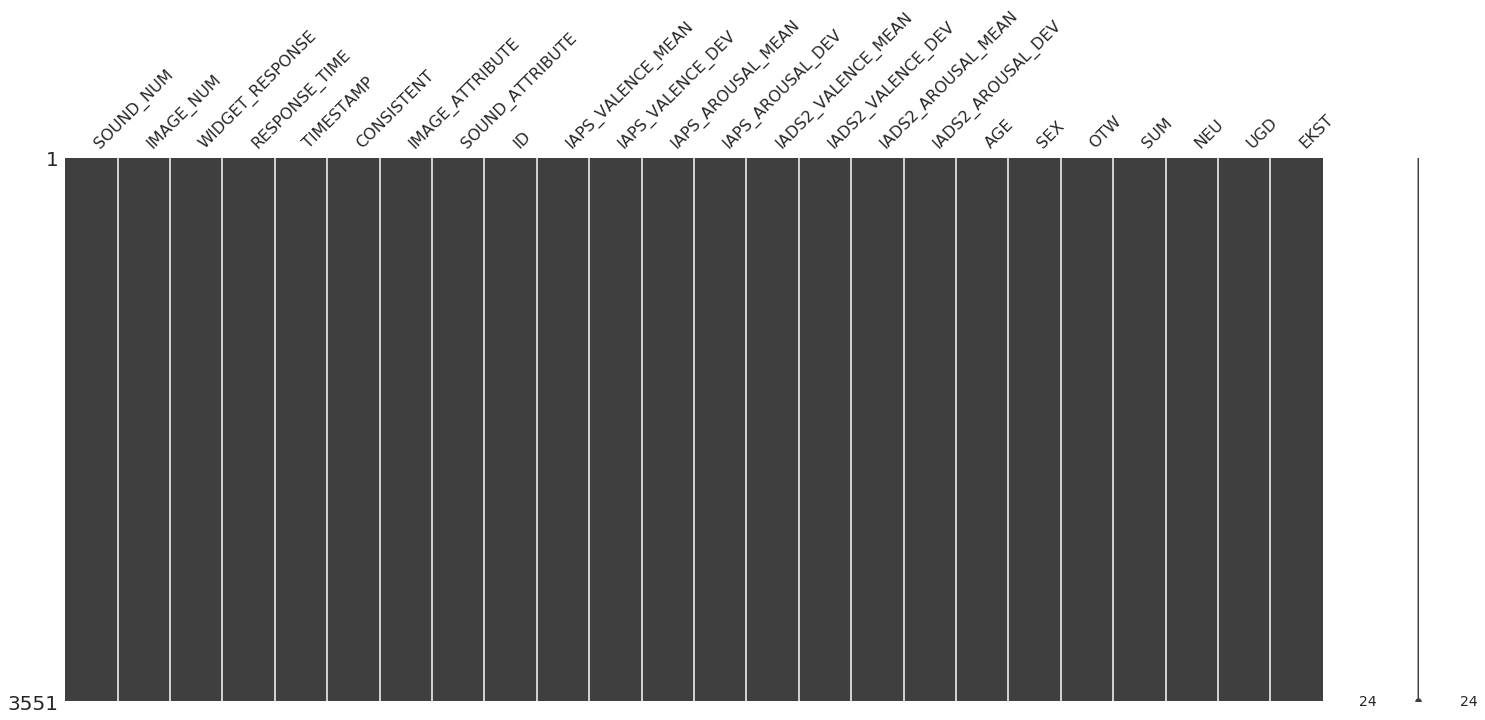

In [95]:
msno.matrix(data_scale_total)

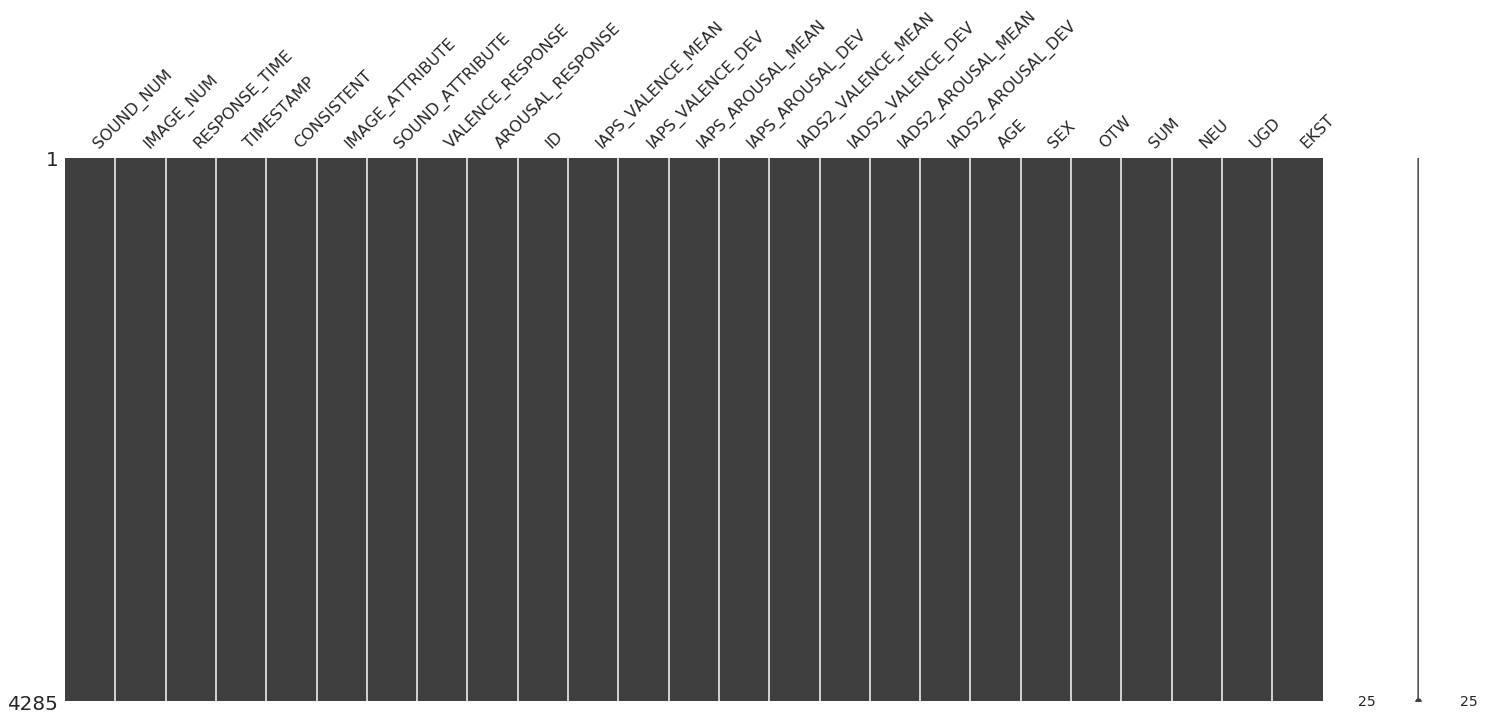

In [96]:
msno.matrix(data_space_total)

## 4. Distribution

### 4.1. Sound and Image count plot per widget type

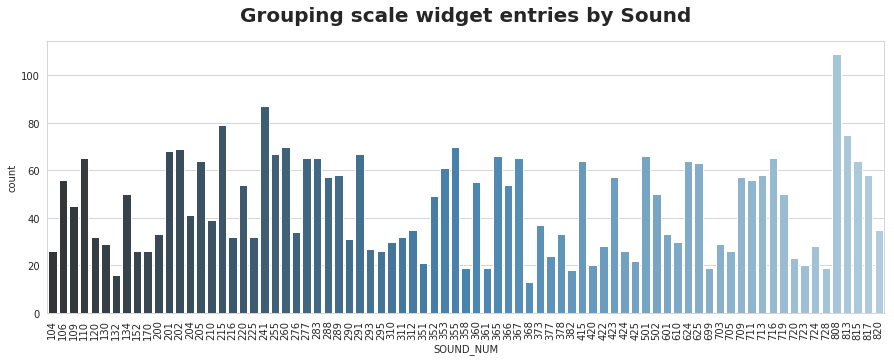

In [97]:
plt.figure(figsize=(15,5))
sns.set_style("whitegrid")
plt.title('Grouping scale widget entries by Sound', fontsize=20, fontweight='bold', y=1.05,)
sns.countplot(x="SOUND_NUM", data=data_scale_total, palette="Blues_d");
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.show()

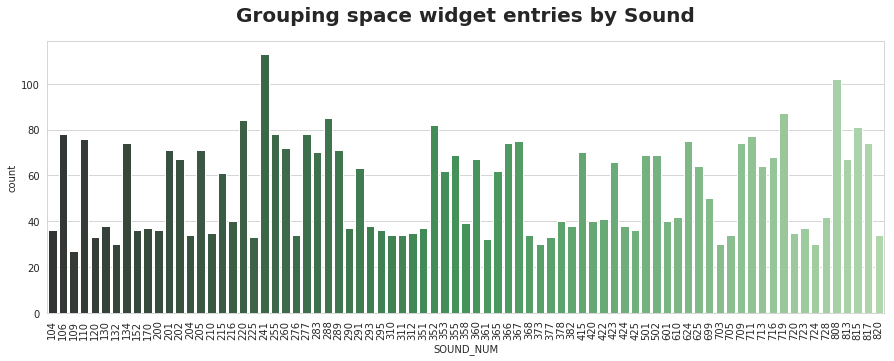

In [98]:
plt.figure(figsize=(15,5))
sns.set_style("whitegrid")
plt.title('Grouping space widget entries by Sound', fontsize=20, fontweight='bold', y=1.05,)
sns.countplot(x="SOUND_NUM", data=data_space_total, palette="Greens_d");
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.show()

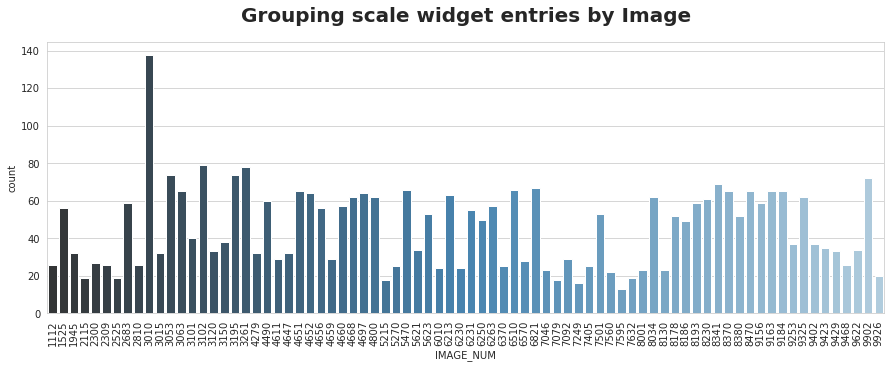

In [99]:
plt.figure(figsize=(15,5))
sns.set_style("whitegrid")
plt.title('Grouping scale widget entries by Image', fontsize=20, fontweight='bold', y=1.05,)
sns.countplot(x="IMAGE_NUM", data=data_scale_total, palette="Blues_d");
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.show()

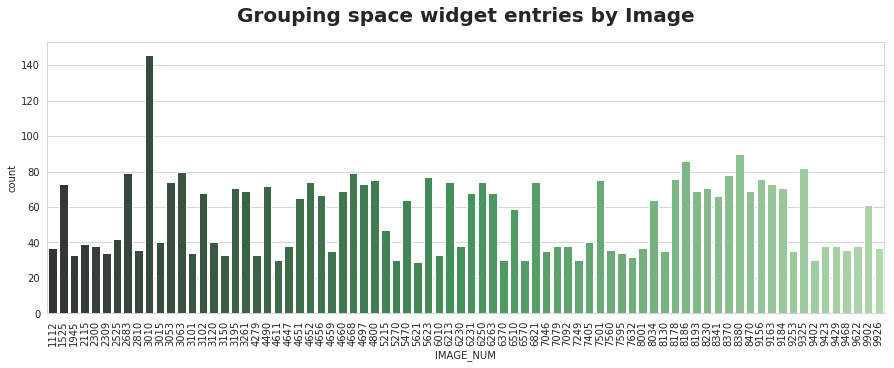

In [100]:
plt.figure(figsize=(15,5))
sns.set_style("whitegrid")
plt.title('Grouping space widget entries by Image', fontsize=20, fontweight='bold', y=1.05,)
sns.countplot(x="IMAGE_NUM", data=data_space_total, palette="Greens_d");
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.show()

## 5. Assessment of the participant vs. characteristics [SOUND]

### 5.1. Mean 

In [159]:
data_space_sound_means = data_space_total[["SOUND_NUM", "VALENCE_RESPONSE", "AROUSAL_RESPONSE"]].groupby("SOUND_NUM").mean()
data_space_sound_means = pd.merge(data_space_sound_means, IADS2, how="inner", left_on='SOUND_NUM', right_on='IADS2_ID')

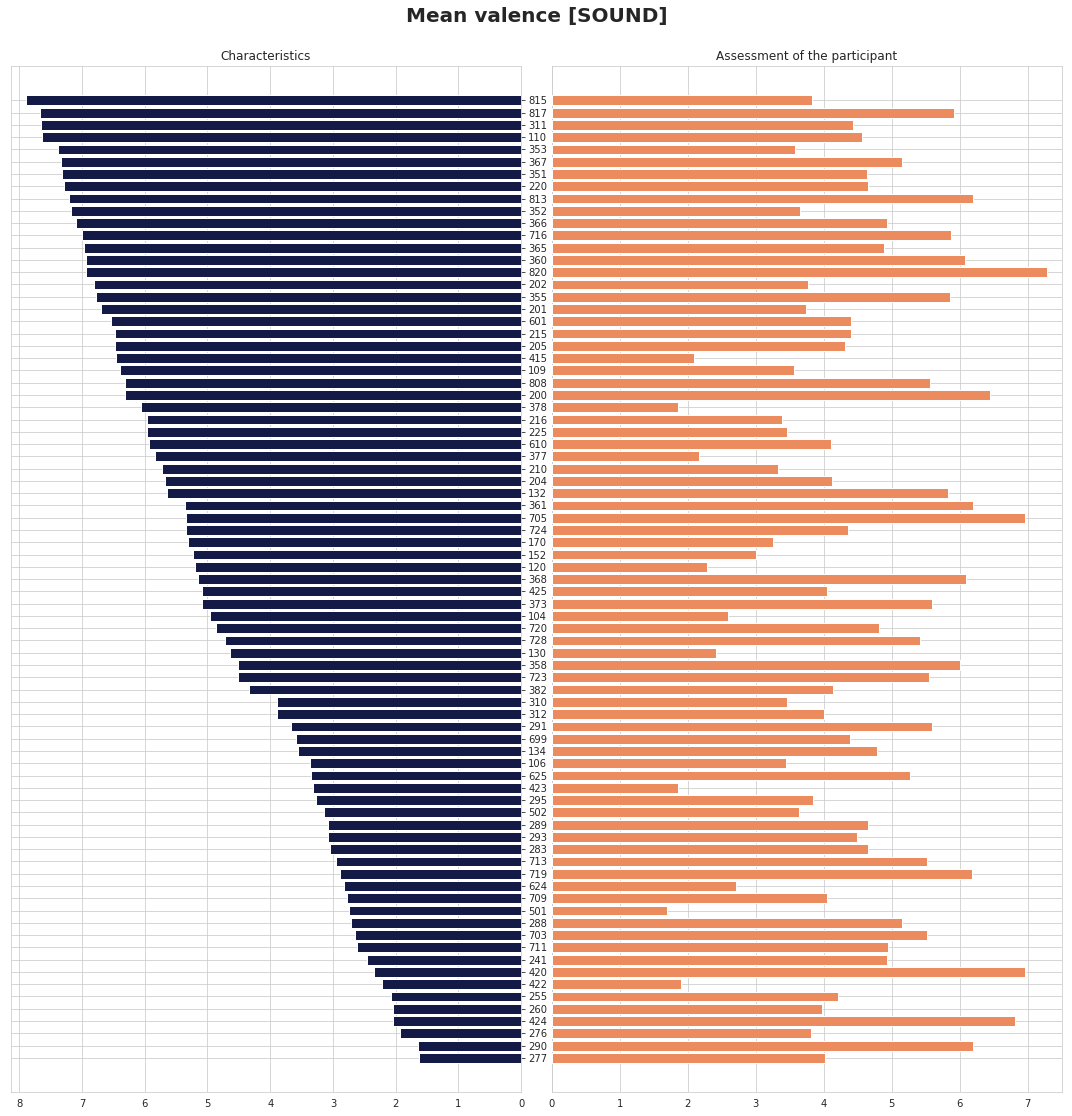

In [160]:
states = data_space_sound_means["IADS2_ID"].values
assessment = data_space_sound_means["VALENCE_RESPONSE"].values
characteristics = data_space_sound_means["IADS2_VALENCE_MEAN"].values

# Sort by number of sales staff
idx = characteristics.argsort()
states, characteristics, assessment = [np.take(x, idx) for x in [states, characteristics, sales]]
y = np.arange(assessment.size)

fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(15,15))
fig.suptitle("Mean valence [SOUND]", fontsize=20, fontweight='bold', y=1.03)

axes[0].barh(y, characteristics, align='center', color='#141A46', zorder=10)
axes[0].set(title='Characteristics')
axes[1].barh(y, assessment, align='center', color='#EC8B5E', zorder=10)
axes[1].set(title='Assessment of the participant')

axes[0].invert_xaxis()
axes[0].set(yticks=y, yticklabels=states)
axes[0].yaxis.tick_right()

for ax in axes.flat:
    ax.margins(0.03)
    ax.grid(True)

fig.tight_layout()
fig.subplots_adjust(wspace=0.06)
plt.show()

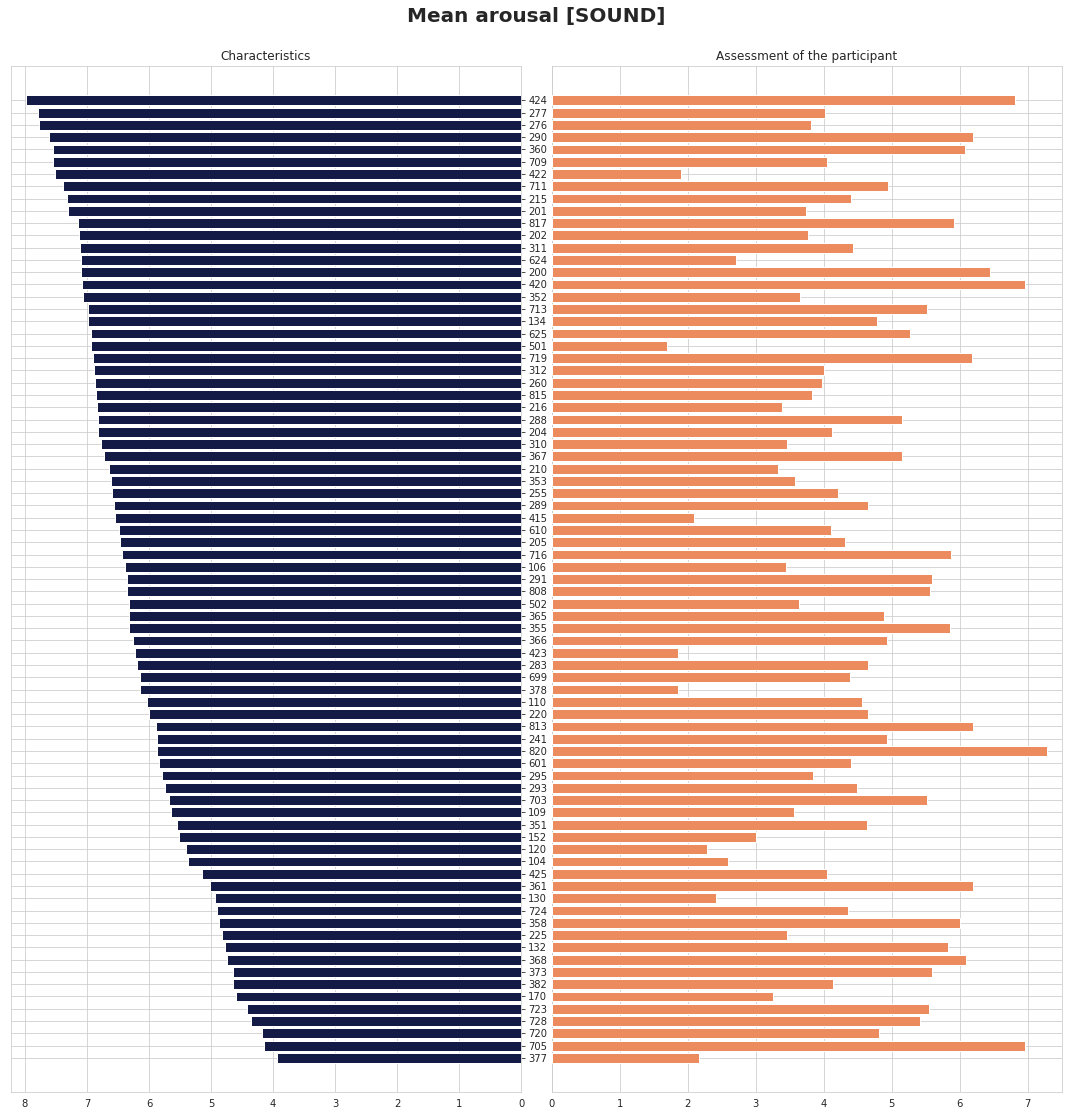

In [161]:
states = data_space_sound_means["IADS2_ID"].values
assessment = data_space_sound_means["AROUSAL_RESPONSE"].values
characteristics = data_space_sound_means["IADS2_AROUSAL_MEAN"].values

# Sort by number of sales staff
idx = characteristics.argsort()
states, characteristics, assessment = [np.take(x, idx) for x in [states, characteristics, sales]]
y = np.arange(assessment.size)

fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(15,15))
fig.suptitle("Mean arousal [SOUND]", fontsize=20, fontweight='bold', y=1.03)

axes[0].barh(y, characteristics, align='center', color='#141A46', zorder=10)
axes[0].set(title='Characteristics')
axes[1].barh(y, assessment, align='center', color='#EC8B5E', zorder=10)
axes[1].set(title='Assessment of the participant')

axes[0].invert_xaxis()
axes[0].set(yticks=y, yticklabels=states)
axes[0].yaxis.tick_right()

for ax in axes.flat:
    ax.margins(0.03)
    ax.grid(True)

fig.tight_layout()
fig.subplots_adjust(wspace=0.06)
plt.show()

### 5.2. Standard deviation

In [162]:
data_space_sound_std = data_space_total[["SOUND_NUM", "VALENCE_RESPONSE", "AROUSAL_RESPONSE"]].groupby("SOUND_NUM").std()
data_space_sound_std = pd.merge(data_space_sound_std, IADS2, how="inner", left_on='SOUND_NUM', right_on='IADS2_ID')

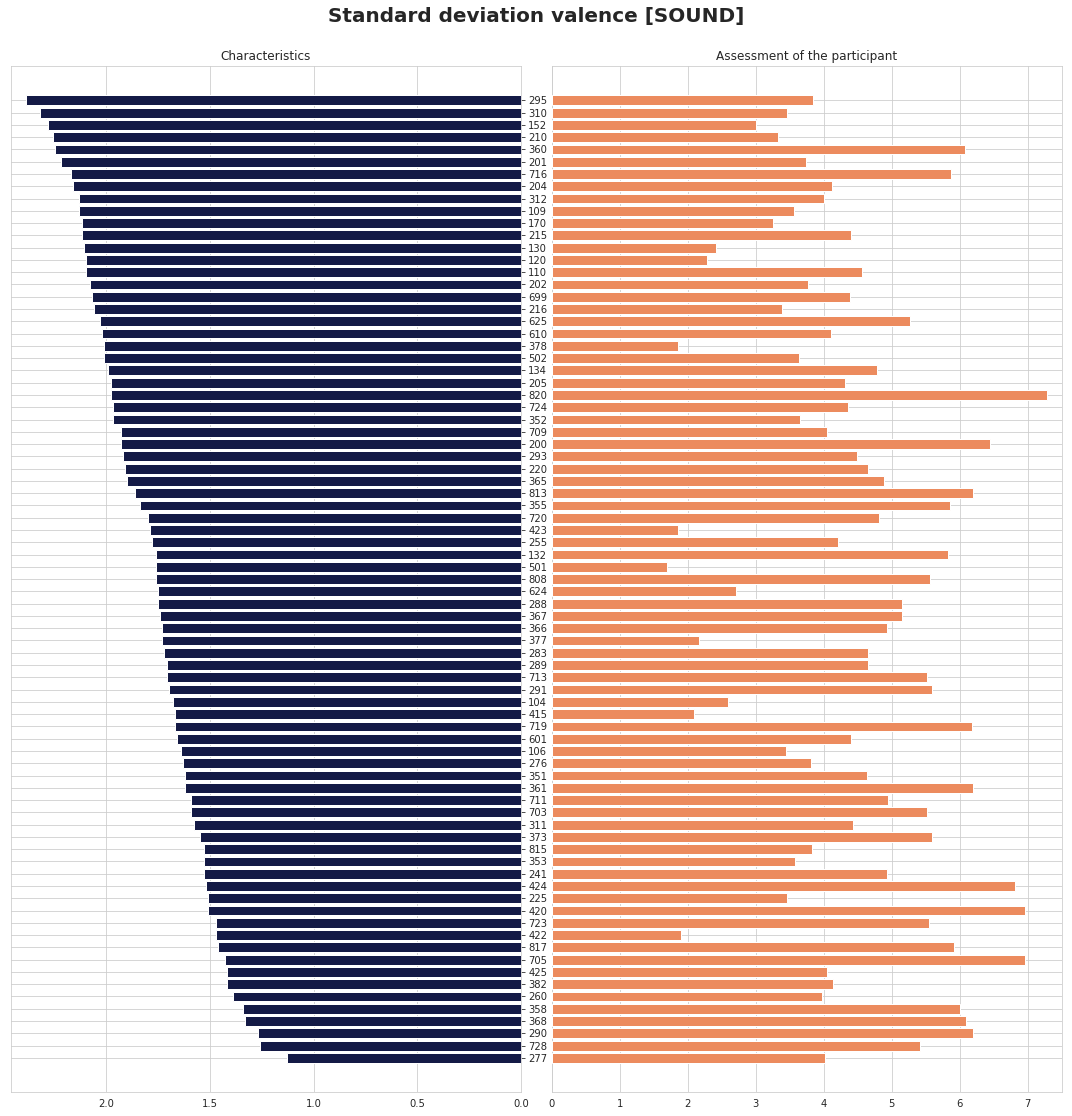

In [163]:
states = data_space_sound_std["IADS2_ID"].values
assessment = data_space_sound_std["VALENCE_RESPONSE"].values
characteristics = data_space_sound_std["IADS2_VALENCE_DEV"].values

# Sort by number of sales staff
idx = characteristics.argsort()
states, characteristics, assessment = [np.take(x, idx) for x in [states, characteristics, sales]]
y = np.arange(assessment.size)

fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(15,15))
fig.suptitle("Standard deviation valence [SOUND]", fontsize=20, fontweight='bold', y=1.03)

axes[0].barh(y, characteristics, align='center', color='#141A46', zorder=10)
axes[0].set(title='Characteristics')
axes[1].barh(y, assessment, align='center', color='#EC8B5E', zorder=10)
axes[1].set(title='Assessment of the participant')

axes[0].invert_xaxis()
axes[0].set(yticks=y, yticklabels=states)
axes[0].yaxis.tick_right()

for ax in axes.flat:
    ax.margins(0.03)
    ax.grid(True)

fig.tight_layout()
fig.subplots_adjust(wspace=0.06)
plt.show()

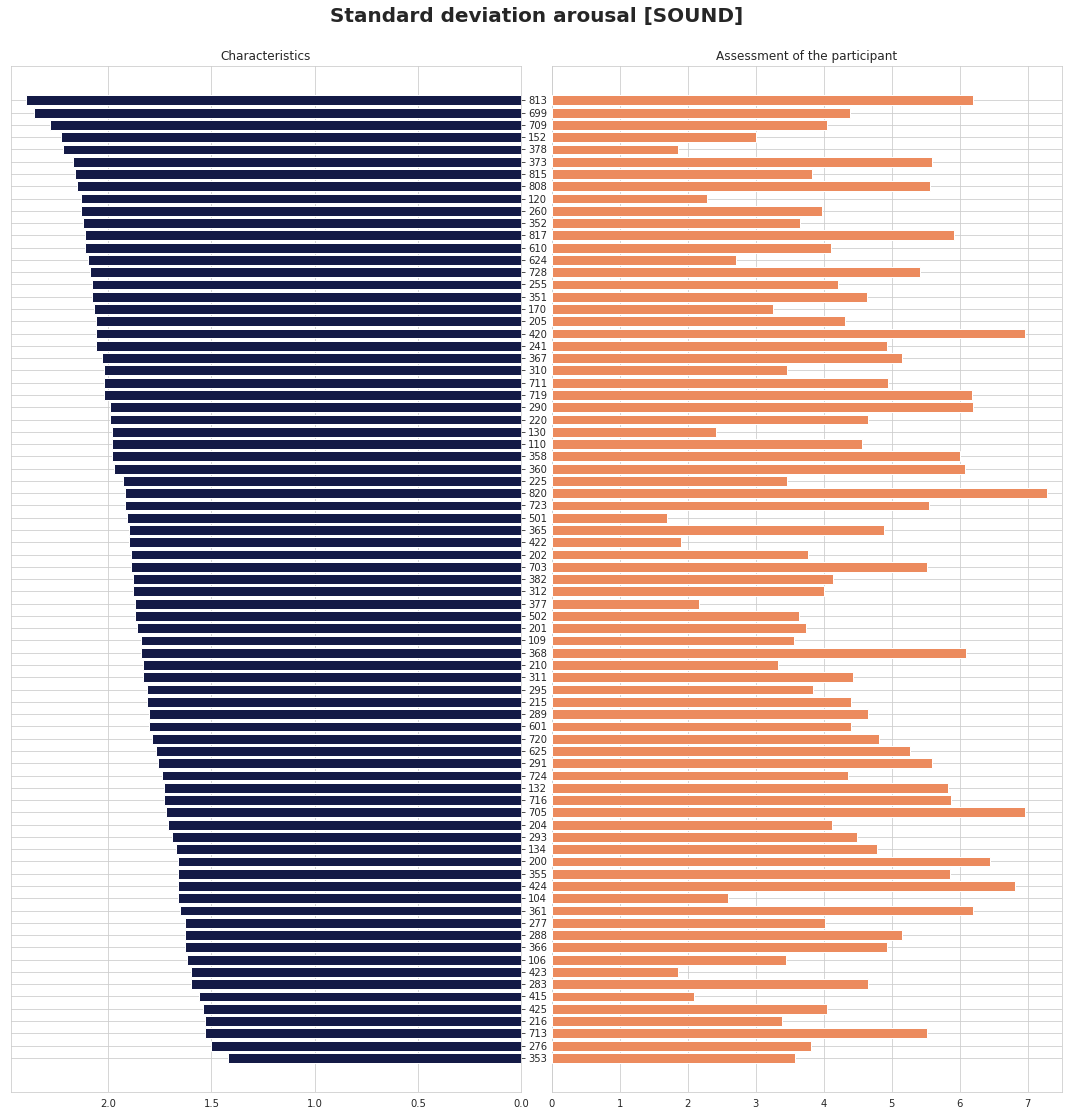

In [164]:
states = data_space_sound_std["IADS2_ID"].values
assessment = data_space_sound_std["AROUSAL_RESPONSE"].values
characteristics = data_space_sound_std["IADS2_AROUSAL_DEV"].values

# Sort by number of sales staff
idx = characteristics.argsort()
states, characteristics, assessment = [np.take(x, idx) for x in [states, characteristics, sales]]
y = np.arange(assessment.size)

fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(15,15))
fig.suptitle("Standard deviation arousal [SOUND]", fontsize=20, fontweight='bold', y=1.03)

axes[0].barh(y, characteristics, align='center', color='#141A46', zorder=10)
axes[0].set(title='Characteristics')
axes[1].barh(y, assessment, align='center', color='#EC8B5E', zorder=10)
axes[1].set(title='Assessment of the participant')

axes[0].invert_xaxis()
axes[0].set(yticks=y, yticklabels=states)
axes[0].yaxis.tick_right()

for ax in axes.flat:
    ax.margins(0.03)
    ax.grid(True)

fig.tight_layout()
fig.subplots_adjust(wspace=0.06)
plt.show()

## 6. Assessment of the participant vs. characteristics [IMAGE]

### 6.1. Mean

In [165]:
data_space_image_means = data_space_total[["IMAGE_NUM", "VALENCE_RESPONSE", "AROUSAL_RESPONSE"]].groupby("IMAGE_NUM").mean()
data_space_image_means = pd.merge(data_space_image_means, IPAS, how="inner", left_on='IMAGE_NUM', right_on='IAPS_ID')

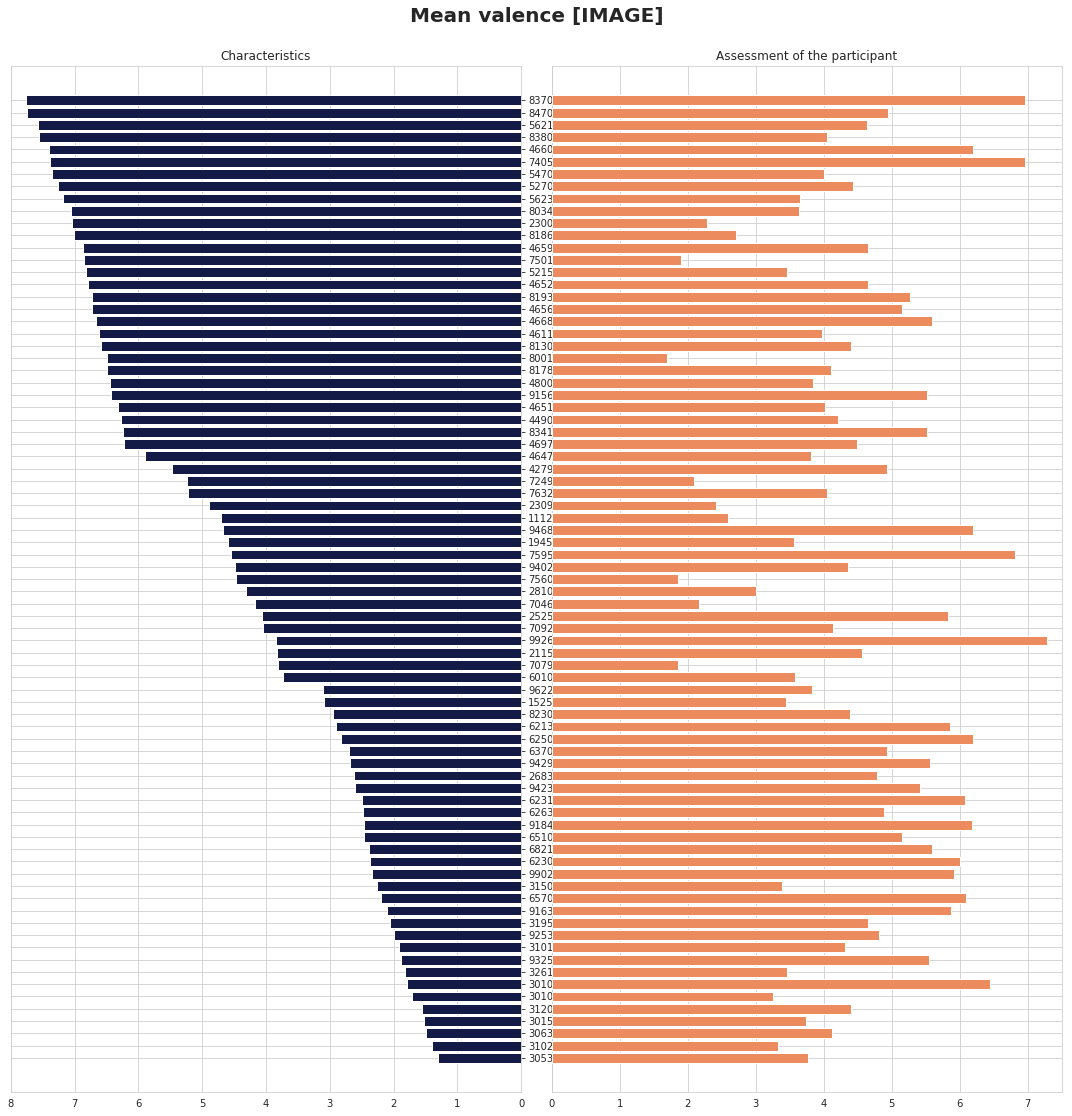

In [167]:
states = data_space_image_means["IAPS_ID"].values
assessment = data_space_image_means["VALENCE_RESPONSE"].values
characteristics = data_space_image_means["IAPS_VALENCE_MEAN"].values

# Sort by number of sales staff
idx = characteristics.argsort()
states, characteristics, assessment = [np.take(x, idx) for x in [states, characteristics, sales]]
y = np.arange(assessment.size)

fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(15,15))
fig.suptitle("Mean valence [IMAGE]", fontsize=20, fontweight='bold', y=1.03)

axes[0].barh(y, characteristics, align='center', color='#141A46', zorder=10)
axes[0].set(title='Characteristics')
axes[1].barh(y, assessment, align='center', color='#EC8B5E', zorder=10)
axes[1].set(title='Assessment of the participant')

axes[0].invert_xaxis()
axes[0].set(yticks=y, yticklabels=states)
axes[0].yaxis.tick_right()

for ax in axes.flat:
    ax.margins(0.03)
    ax.grid(True)

fig.tight_layout()
fig.subplots_adjust(wspace=0.06)
plt.show()

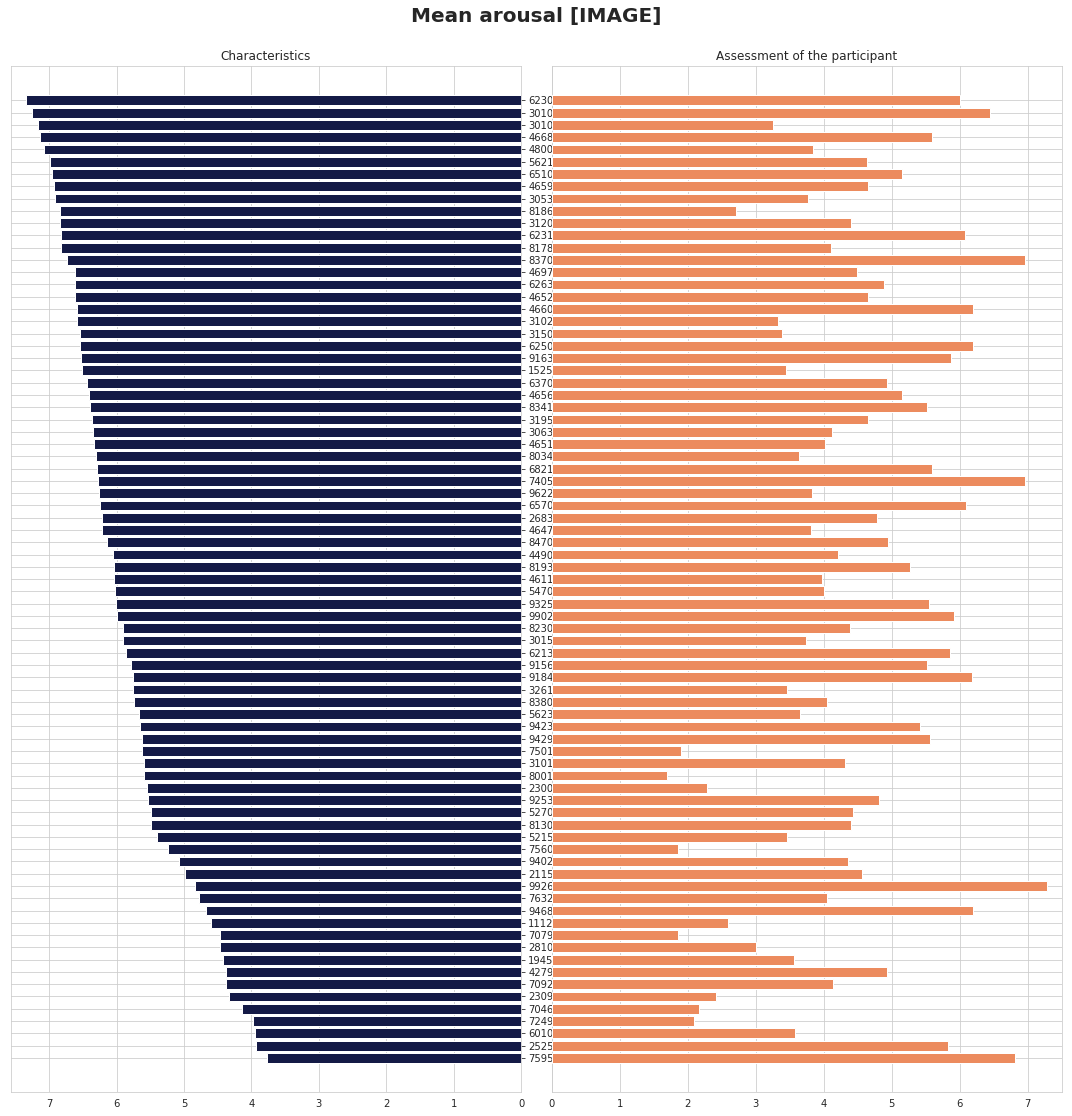

In [168]:
states = data_space_image_means["IAPS_ID"].values
assessment = data_space_image_means["AROUSAL_RESPONSE"].values
characteristics = data_space_image_means["IAPS_AROUSAL_MEAN"].values

# Sort by number of sales staff
idx = characteristics.argsort()
states, characteristics, assessment = [np.take(x, idx) for x in [states, characteristics, sales]]
y = np.arange(assessment.size)

fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(15,15))
fig.suptitle("Mean arousal [IMAGE]", fontsize=20, fontweight='bold', y=1.03)

axes[0].barh(y, characteristics, align='center', color='#141A46', zorder=10)
axes[0].set(title='Characteristics')
axes[1].barh(y, assessment, align='center', color='#EC8B5E', zorder=10)
axes[1].set(title='Assessment of the participant')

axes[0].invert_xaxis()
axes[0].set(yticks=y, yticklabels=states)
axes[0].yaxis.tick_right()

for ax in axes.flat:
    ax.margins(0.03)
    ax.grid(True)

fig.tight_layout()
fig.subplots_adjust(wspace=0.06)
plt.show()

### 5.2. Standard deviation